<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Aluno(a): Adriana Kaori Kakazu <br/>
Data: 10/03/2025 <br/>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Regressão Linear Simples

## 1. Explorando o Dataset

Atividade Avaliativa para N1 do 1◦ Bimestre, a entrega ser´a individual. Cada estudante
 dever´a realizar o in´ ıcio da an´alise explorat´oria para o conjunto de dados Movie Lens (small):
 https://grouplens.org/datasets/movielens/.

### 1.1. Importando o Dataset

In [6]:
df1 = pd.read_csv('/content/links.csv'); df2 = pd.read_csv('/content/movies.csv'); df3 = pd.read_csv('/content/ratings.csv'); df4 = pd.read_csv('/content/tags.csv');

In [14]:
df1.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
df3.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [28]:
df4.head()

,usuarioId,filmeId,tag,marcaTemporal
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### 1.2. Renomeando as colunas

In [23]:
df1.columns = ['filmeId',	'imdbId',	'tmdbId']

In [24]:
df2.columns = ['filmeId',	'titulo',	'generos']

In [26]:
df3.columns = ['usuarioId',	'filmeId',	'avaliacao',	'marcaTemporal']

In [27]:
df4.columns = ['usuarioId',	'filmeId',	'tag',	'marcaTemporal']

### 1.3. Informações básicas do dataset e aplicando correções

In [15]:
print(f'O dataset possui {df1.shape[0]} exemplos/amostras/linhas e {df1.shape[1]} atributos/variáveis/colunas.')

O dataset possui 9742 exemplos/amostras/linhas e 3 atributos/variáveis/colunas.


In [16]:
print(f'O dataset possui {df2.shape[0]} exemplos/amostras/linhas e {df2.shape[1]} atributos/variáveis/colunas.')

O dataset possui 9742 exemplos/amostras/linhas e 3 atributos/variáveis/colunas.


In [17]:
print(f'O dataset possui {df3.shape[0]} exemplos/amostras/linhas e {df3.shape[1]} atributos/variáveis/colunas.')

O dataset possui 100836 exemplos/amostras/linhas e 4 atributos/variáveis/colunas.


In [18]:
print(f'O dataset possui {df4.shape[0]} exemplos/amostras/linhas e {df4.shape[1]} atributos/variáveis/colunas.')

O dataset possui 3683 exemplos/amostras/linhas e 4 atributos/variáveis/colunas.


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   filmeId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9742 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [33]:
df1['tmdbId'].fillna(0, inplace=True)

<ipython-input-33-99ac344d111b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['tmdbId'].fillna(0, inplace=True)


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   filmeId  9742 non-null   int64 
 1   titulo   9742 non-null   object
 2   generos  9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   usuarioId      100836 non-null  int64         
 1   filmeId        100836 non-null  int64         
 2   avaliacao      100836 non-null  float64       
 3   marcaTemporal  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [35]:
df3['marcaTemporal'] = pd.to_datetime(df3['marcaTemporal'], unit='s')

In [38]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   usuarioId      3683 non-null   int64         
 1   filmeId        3683 non-null   int64         
 2   tag            3683 non-null   object        
 3   marcaTemporal  3683 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 115.2+ KB


In [37]:
df4['marcaTemporal'] = pd.to_datetime(df4['marcaTemporal'], unit='s')

### 1.3. Estatísticas Descritivas

In [ ]:
df.describe()

,Anos de Experiencia,Salario
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'Boxplot dos Salarios')

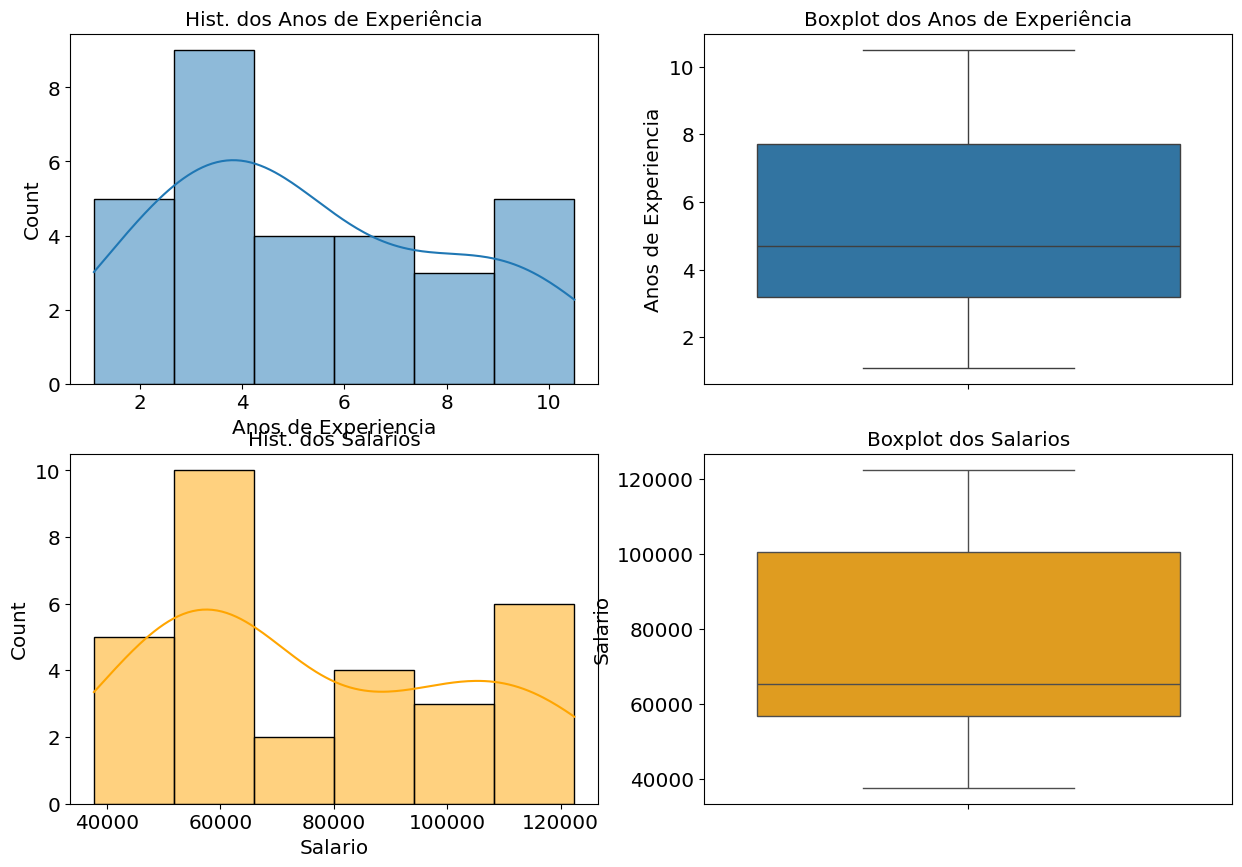

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x='Anos de Experiencia', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Hist. dos Anos de Experiência')

sns.boxplot(data=df, y='Anos de Experiencia', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot dos Anos de Experiência')

sns.histplot(data=df, x='Salario', kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Hist. dos Salarios')

sns.boxplot(data=df, y='Salario', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Boxplot dos Salarios')

### 1.4. Matriz de correlação

O **coeficiente de correlação** é uma medida que mede a associação linear entre duas variáveis. Seu valor varia de **_-1_** (associação negativa perfeita) e **_+1_** (associação positiva perfeita).
<img src="https://github.com/xavecoding/IFSP-CMP-D1AED-2021.1/blob/main/regressao_linear/imgs/correlation_coefficient.png?raw=1" width="70%" /> <br/>
Fonte: https://dataz4s.com/statistics/correlation-coefficient/

In [ ]:
df.corr()

,Anos de Experiencia,Salario
Anos de Experiencia,1.000000,0.978242
Salario,0.978242,1.000000


<Axes: xlabel='Anos de Experiencia', ylabel='Salario'>

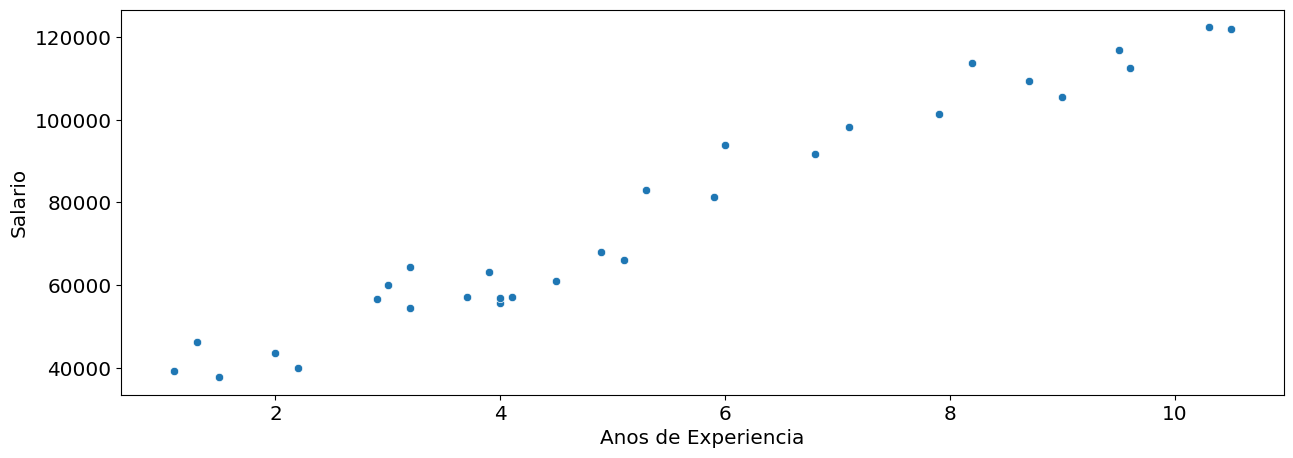

In [ ]:
sns.scatterplot(data=df, x='Anos de Experiencia', y='Salario')

## 2. Variável Dependente (y) vs Variáveis Independentes/Explicativas (X)

### `lmplot`
Plota o gráfico de regressão linear, usado para visualizar a relação entre duas variáveis.

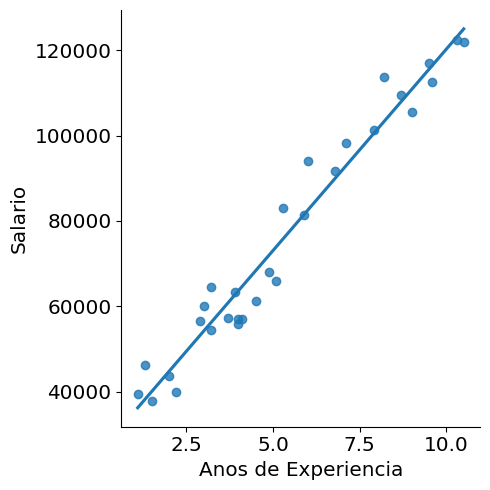

In [ ]:
sns.lmplot(data=df, x='Anos de Experiencia', y='Salario', ci=None)

## 3. Estimando um modelo de regressão linear

A **regressão linear** é uma abordagem para modelar o relacionamento entre variáveis independentes (explicativas) e dependentes numéricas, ajustando um modelo linear (p. ex., uma reta) para as observações de um conjunto treinamento.

Tal modelo linear é usado para a prever variáveis dependentes numéricas a partir das variáveis independentes de novas observações (ainda não vistas).

### 3.1. Extraindo as variáveis independentes e dependentes

In [ ]:
df.head()

,Anos de Experiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Criando um DataFrame para armazenar as variáveis independentes/explicativas (X)

In [ ]:
X = df[['Anos de Experiencia']]

In [ ]:
X.head()

,Anos de Experiencia
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
X.shape

(30, 1)

#### Criando uma Series para armazenar a variável dependente (y)

In [ ]:
y = df['Salario']

In [ ]:
y

,Salario
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


### 3.2. Dividindo o dataset em Conjunto de Treinamento e Conjunto de Teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test_size = 0.2  # taxa de amostras/exemplos que serão amostras/exemplos de teste ==> 20%
seed = 999

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#### Verificando os tamanhos dos conjuntos de treino e teste

In [ ]:
X. shape, y.shape

((30, 1), (30,))

In [ ]:
X_train.shape, y_train.shape

((24, 1), (24,))

In [ ]:
df

,Anos de Experiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X_test.shape, y_test.shape

((6, 1), (6,))

### 3.3. Treinando o modelo de Regressão Linear Simples com o Conjunto de Treinamento

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
#treinando nosso regressor linear simples
regressor.fit(X_train, y_train) #fit==> ajustar

LinearRegression()

In [ ]:
regressor.intercept_ #b0

26734.178627931804

In [ ]:
regressor.coef_ #b1

array([9209.84554839])

A partir do conjunto de treinamento estabelecido, nossa reta é então: <br/>
**h(x) = 26734.178627931804 + 9209.84554839 * x**

O salário anual predito de um trabalhador **sem experiência (zero anos)** é de $ 26734.2 (_intercepto b0_).

**Para cada ano adicional de experiência**, o salário anual do trabalhador cresce em $ 9209.8 (_inclinação da reta b1_).

## 4. Predizendo os Salários para as Amostras/Exemplos de Teste

### 4.1. Predição

In [ ]:
X_test

,Anos de Experiencia
14,4.5
21,7.1
29,10.5
23,8.2
3,2.0
24,8.7


In [ ]:
y_test  # "gabarito" ==> valor real que queremos estimar (ou chegar perto) com nosso modelo linear

,Salario
14,61111.0
21,98273.0
29,121872.0
23,113812.0
3,43525.0
24,109431.0


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 68178.4835957 ,  92124.08202152, 123437.55688605, 102254.91212475,
        45153.86972472, 106859.83489894])

In [ ]:
resultados = pd.DataFrame({
    'Anos de Experiencia': X_test['Anos de Experiencia'],
    'Salario (Real)': y_test,
    'Salario (Predicao)': y_pred.round(1),
    'Erro Absoluto': abs(y_test - y_pred).round(1),
    'Erro Absoluto [%]': (100 * abs(y_test - y_pred) / abs(y_test)).round(1)
})

In [ ]:
resultados

,Anos de Experiencia,Salario (Real),Salario (Predicao),Erro Absoluto,Erro Absoluto [%]
14,4.5,61111.0,68178.5,7067.5,11.6
21,7.1,98273.0,92124.1,6148.9,6.3
29,10.5,121872.0,123437.6,1565.6,1.3
23,8.2,113812.0,102254.9,11557.1,10.2
3,2.0,43525.0,45153.9,1628.9,3.7
24,8.7,109431.0,106859.8,2571.2,2.3


### 4.2. Visualizando os Registros com o Modelo Linear

In [ ]:
regression_line_x = X['Anos de Experiencia']
regression_line_y = regressor.predict(X)

In [ ]:
X_labeled = X.copy()
X_labeled['Label'] = 'Train'
X_labeled

,Anos de Experiencia,Label
0,1.1,Train
1,1.3,Train
2,1.5,Train
3,2.0,Train
4,2.2,Train
5,2.9,Train
6,3.0,Train
7,3.2,Train
8,3.2,Train
9,3.7,Train


In [ ]:
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

,Anos de Experiencia,Label
0,1.1,Train
1,1.3,Train
2,1.5,Train
3,2.0,Test
4,2.2,Train
5,2.9,Train
6,3.0,Train
7,3.2,Train
8,3.2,Train
9,3.7,Train


In [ ]:
y

,Salario
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


<Axes: xlabel='Anos de Experiencia', ylabel='Salario'>

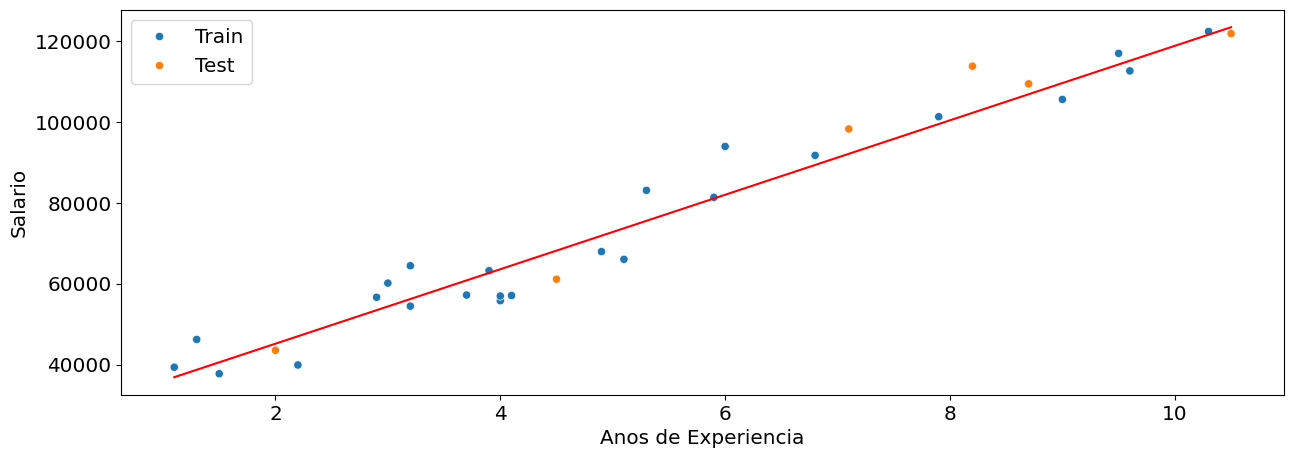

In [ ]:
sns.scatterplot(data=X_labeled, x='Anos de Experiencia', y=y, hue='Label')
sns.lineplot(x=regression_line_x, y=regression_line_y, color='red')